### Setting Up the Workspace

In [1]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import PIL.Image
import cv2
from tensorflow.keras.utils import plot_model
os.chdir('..')
from ml_utils.GAN_utils import *
%load_ext autoreload
%autoreload 2

In [2]:
from tensorflow.keras import backend as K
K.clear_session()

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


### Developing the GAN Model

In [4]:
# Defining the image shape
image_shape = (128,128,3)

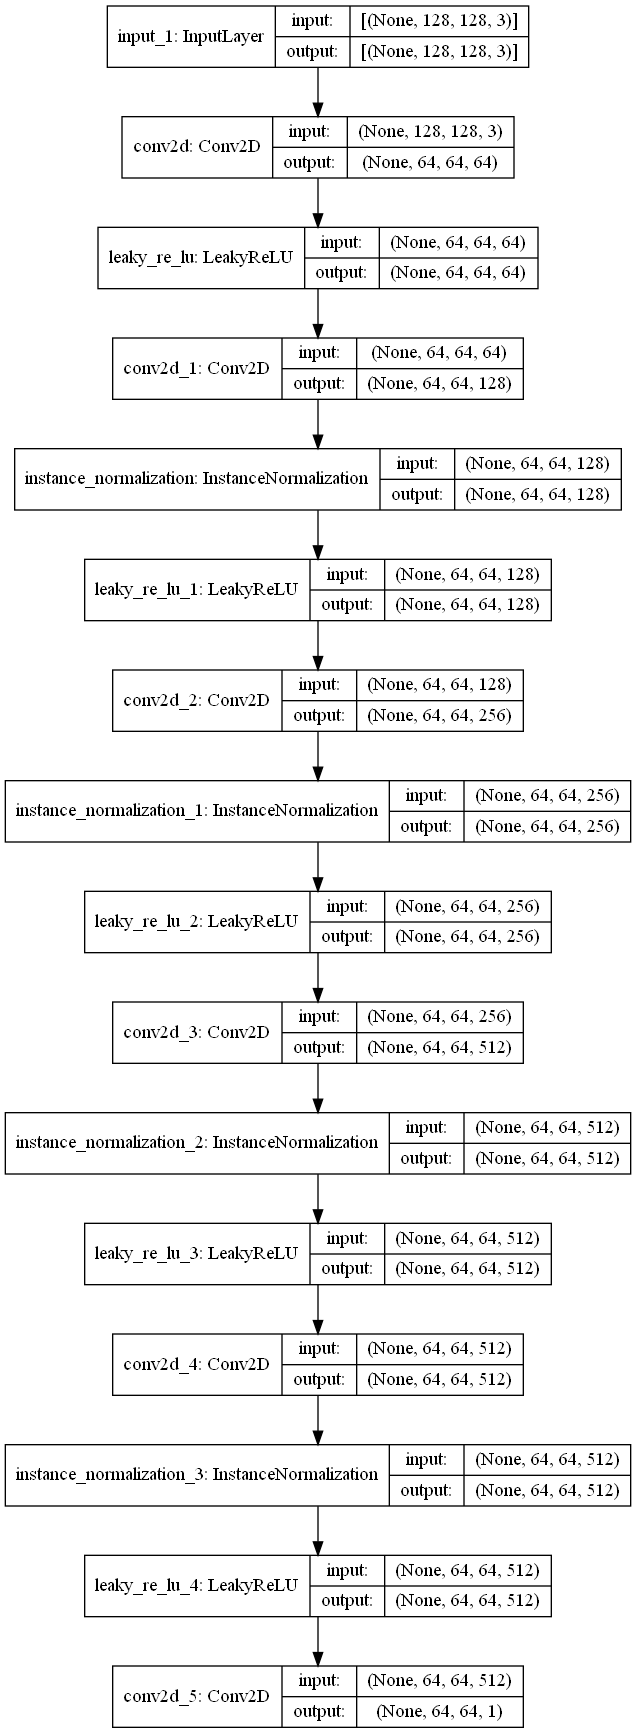

In [5]:
# Defining the Discriminator model for the PatchGAN
model_d = define_discriminator(image_shape)
# summarize the model
# model_d.summary()
# plot the model
plot_model(model_d, to_file='data/model_structure/discriminator_model_plot.png', show_shapes=True, show_layer_names=True)

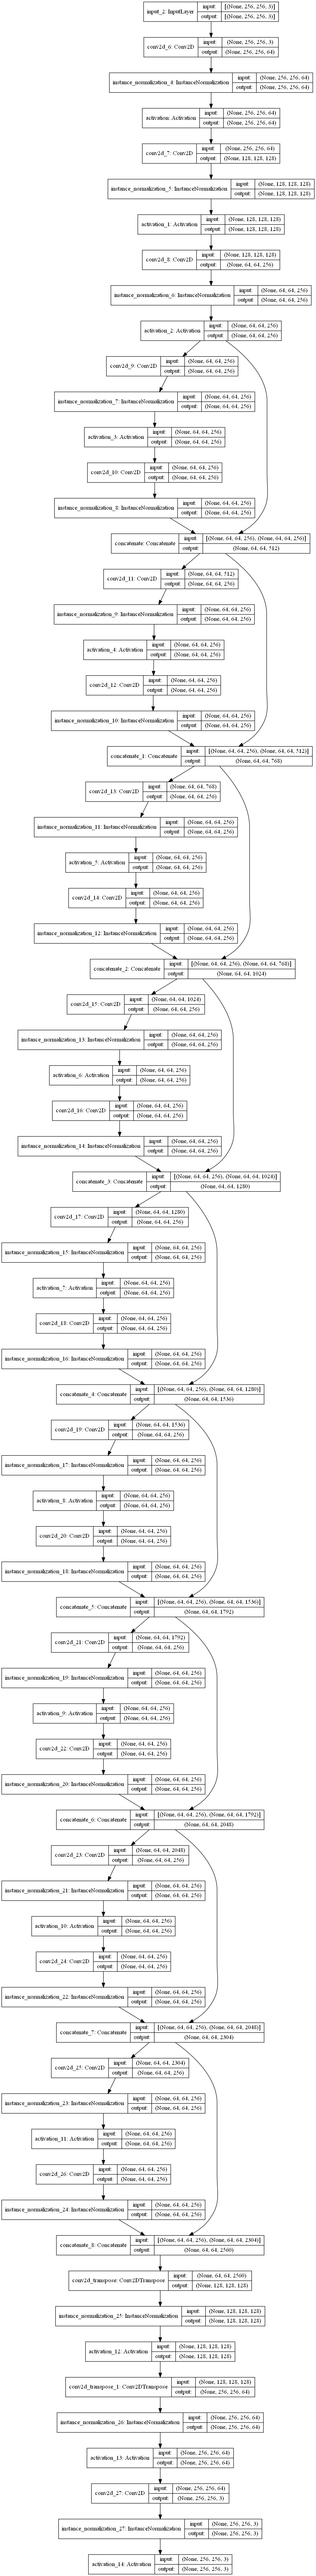

In [6]:
# Defining the Generator model for the PatchGAN
model_g = define_generator()
# summarize the model
# model_g.summary()
# plot the model
plot_model(model_g, to_file='data/model_structure/generator_model_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
# generator: A -> B
g_model_AtoB = define_generator(image_shape)
# generator: B -> A
g_model_BtoA = define_generator(image_shape)
# discriminator: A -> [real/fake]
d_model_A = define_discriminator(image_shape)
# discriminator: B -> [real/fake]
d_model_B = define_discriminator(image_shape)
# composite: A -> B -> [real/fake, A]
c_model_AtoB = define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, image_shape)
# composite: B -> A -> [real/fake, B]
c_model_BtoA = define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, image_shape)

In [8]:
# Loading daytime images as trainA, nighttime images as train B (numpy lists)
path_A = 'data/day/'
path_B = 'data/night/'
images_A = os.listdir(path_A)
images_B = os.listdir(path_B)
trainA=[]
trainB=[]
for i in range(len(images_A)):
    image_label = images_A[i]
    image = PIL.Image.open(str(path_A)+str(image_label))
    image = np.array(image)
    image = np.true_divide(image,255)
    image = cv2.resize(image,(128,128))
    trainA.append(image)
trainA = np.array(trainA)
i=0
for i in range(len(images_B)):
    image_label_B = images_B[i]
    image_B = PIL.Image.open(str(path_B)+str(image_label_B))
    image_B = np.array(image_B)
    image_B = np.true_divide(image_B,255)
    image_B = cv2.resize(image_B,(128,128))
    trainB.append(image_B)
trainB = np.array(trainB)

print(len(trainA))
print(len(trainB))

124
93


In [ ]:
# Training the model
[g_day2night,g_night2day,c_day2night,c_night2day] = train(d_model_A,d_model_B,g_model_AtoB,g_model_BtoA,c_model_AtoB,c_model_BtoA,trainA,trainB)

620


In [ ]:
test(g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, trainA,trainB)